<a href="https://colab.research.google.com/github/T3LNET/OCR/blob/main/Pre_Processing_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7 steps of image pre-processing

In [7]:
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [285]:
image_path = r"/content/7_python-ocr.jpg"

## Normalize

In [126]:
# 1- Normalization
# Open CV Normalization
def cv_image(path):
  image_cv =cv2.imread(path,0)
  image_float = image_cv.astype(np.float32)
  min_val = np.min(image_float)
  max_val = np.max(image_float)
  desired_min=0
  desired_max=255
  alpha = (desired_max - desired_min) / (max_val - min_val)
  beta = desired_min - alpha * min_val
  normalized_image_cv = cv2.normalize(image_float, None, alpha=alpha, beta=beta, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  return image_cv, normalized_image_cv

# PIL Normalization
def pil_image(path):
  image_pil=Image.open(image_path)
  image_array = np.array(image_pil)
  gray_image=cv2.cvtColor(image_array,cv2.COLOR_BGR2GRAY)
  image_float = gray_image.astype(np.float32)
  min_val = np.min(image_float)
  max_val = np.max(image_float)
  desired_min = 0
  desired_max = 255
  alpha = (desired_max - desired_min) / (max_val - min_val)
  beta = desired_min - alpha * min_val
  normalized_image_array = alpha * image_float + beta
  normalized_image_array = np.clip(normalized_image_array, 0, 255,None)
  normalized_image = normalized_image_array.astype(np.uint8)
  #normalized_image_pil = Image.fromarray(normalized_image)
  return image_array, normalized_image

In [216]:
# Normalize & Gray-Scale
def pil_image(image_path):
    image_pil = Image.open(image_path)
    image_array = np.array(image_pil)

    if len(image_array.shape) == 3 and image_array.shape[2] == 3:
        gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
        image_float = gray_image.astype(np.float32)
        min_val = np.min(image_float)
        max_val = np.max(image_float)
        desired_min = 0
        desired_max = 255
        alpha = (desired_max - desired_min) / (max_val - min_val)
        beta = desired_min - alpha * min_val
        normalized_image_array = alpha * image_float + beta
        normalized_image_array = np.clip(normalized_image_array, 0, 255, None)
        normalized_image = normalized_image_array.astype(np.uint8)
    elif len(image_array.shape) == 2:
        normalized_image = image_array
    else:
        raise ValueError("Unsupported image format. Only grayscale and color images are supported.")

    return image_array, normalized_image

In [286]:
cv_img,norm_cv=cv_image(image_path)
pil_img,norm_pil=pil_image(image_path)

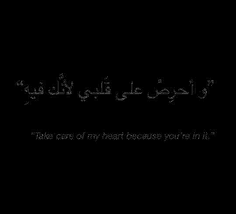

In [131]:
cv2_imshow(norm_pil)

In [110]:
# r"/content/download.png" results

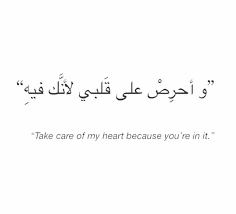

In [219]:
cv2_imshow(cv_img)

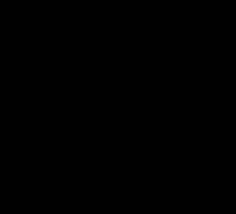

In [220]:
cv2_imshow(norm_cv)

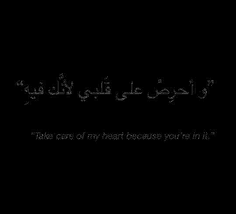

In [218]:
cv2_imshow(norm_pil)

In [94]:
# r"/content/Numerology-in-Farsi.png" results

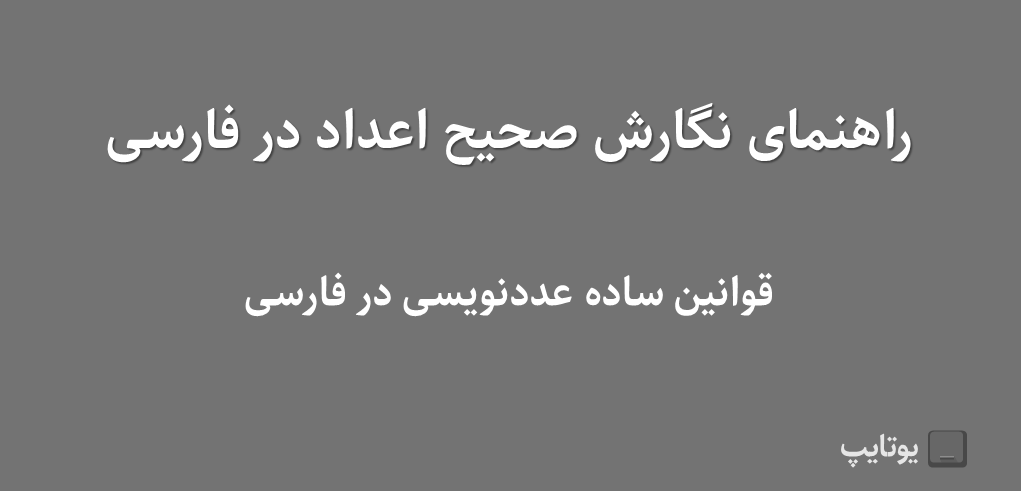

In [95]:
cv2_imshow(cv_img)

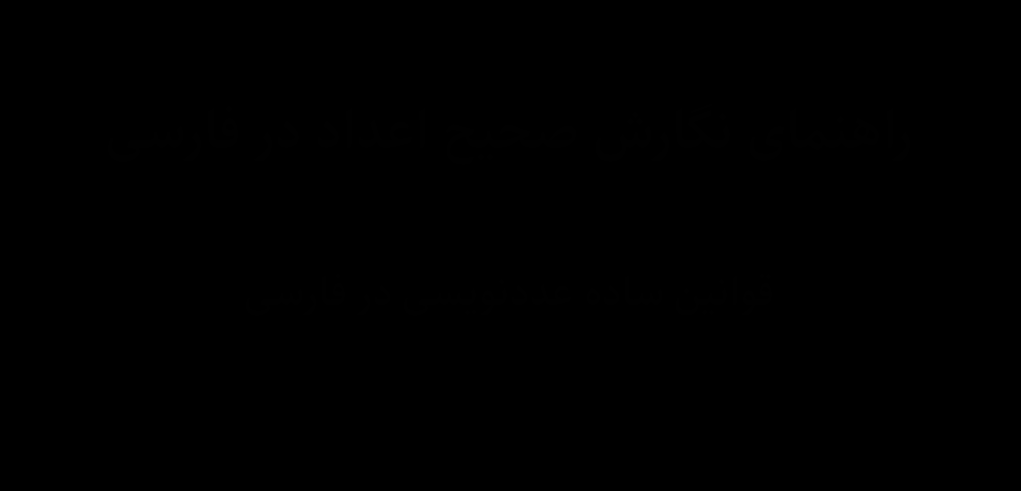

In [96]:
cv2_imshow(norm_cv)

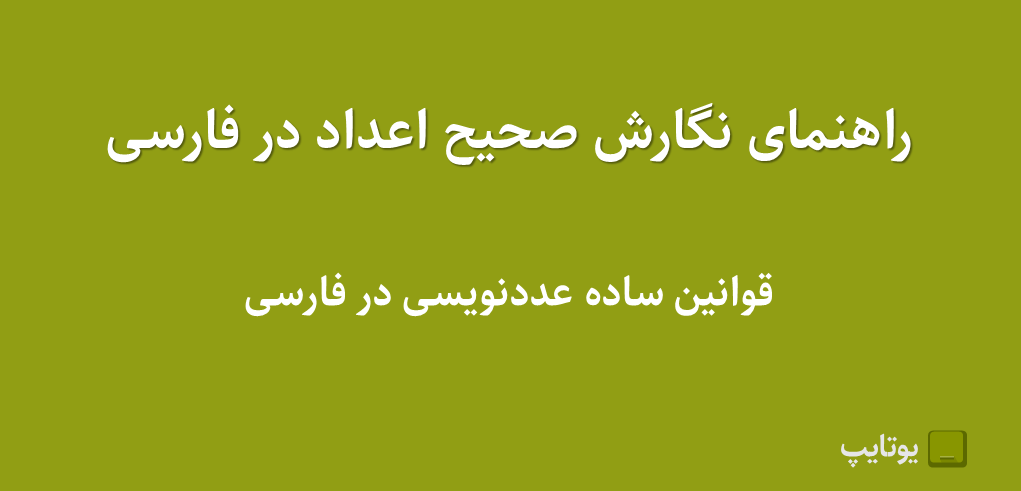

In [97]:
cv2_imshow(pil_img)

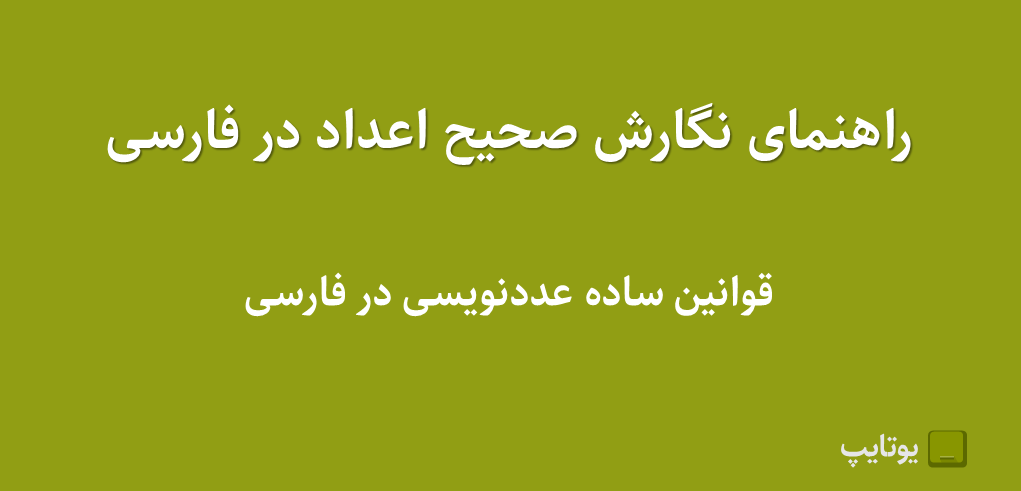

In [98]:
cv2_imshow(norm_pil)

In [102]:
#

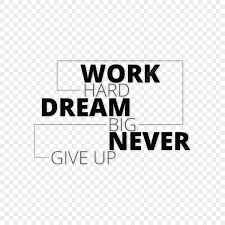

In [103]:
cv2_imshow(cv_img)

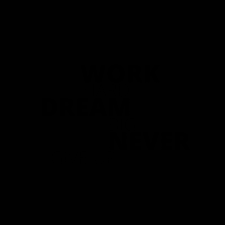

In [104]:
cv2_imshow(norm_cv)

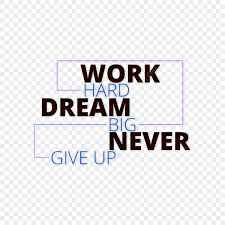

In [105]:
cv2_imshow(pil_img)

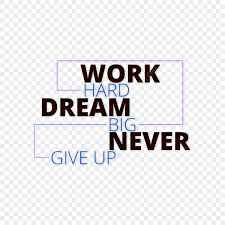

In [106]:
cv2_imshow(norm_pil)

## Skew

## Image Scaling

In [273]:
def scaling_image(image, desired_width=None ,desired_height=None):
  height, width = image.shape[:2]
  if desired_width is not None:
        scaling_factor = desired_width / width
  elif desired_height is not None:
        scaling_factor = desired_height / height
  else:
        raise ValueError("Either desired_width or desired_height must be provided.")
  scaled_image = cv2.resize(image,None,fx=scaling_factor,fy=scaling_factor,interpolation=cv2.INTER_AREA)
  return scaled_image

In [287]:
scaled_img=scaling_image(norm_pil,400,600)

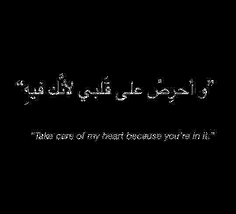

In [122]:
cv2_imshow(norm_pil)

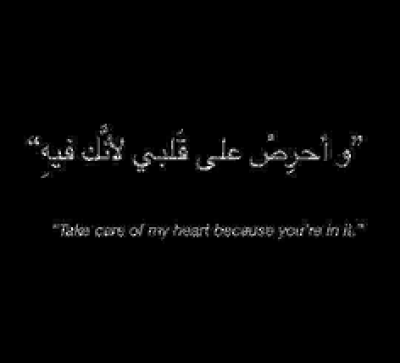

In [121]:
cv2_imshow(scaled_img)

Noise Removal

In [281]:
def noise_removal(image):
  blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
  _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  kernel = np.ones((1, 1), np.uint8)
  morph_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
  morph_image = cv2.morphologyEx(morph_image, cv2.MORPH_CLOSE, kernel)
  return blurred_image,binary_image,morph_image

In [288]:
blr, th ,morph =noise_removal(scaled_img)

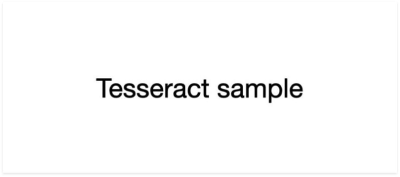

In [267]:
cv2_imshow(scaled_img)

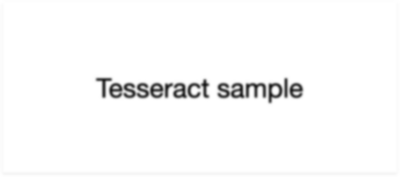

In [268]:
cv2_imshow(blr)

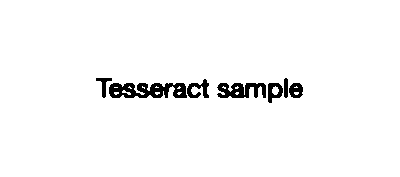

In [269]:
cv2_imshow(th)

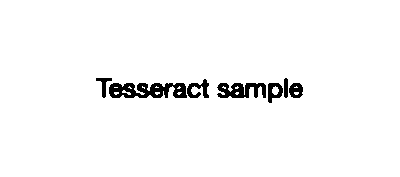

In [289]:
cv2_imshow(morph)

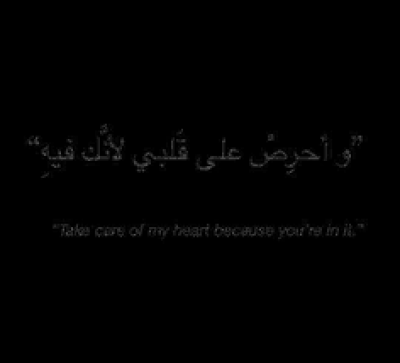

In [277]:
cv2_imshow(scaled_img)

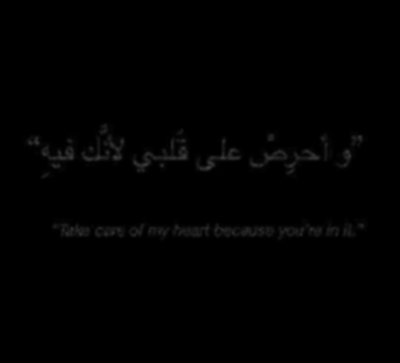

In [278]:
cv2_imshow(blr)

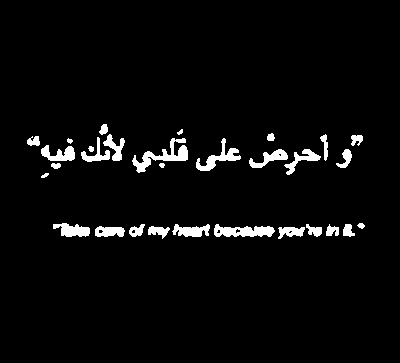

In [279]:
cv2_imshow(th)

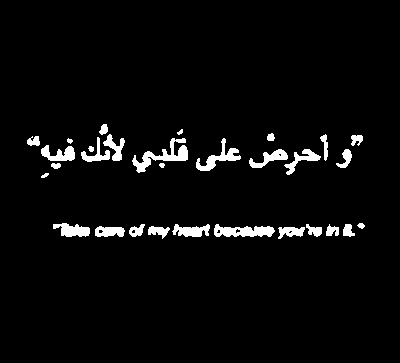

In [283]:
cv2_imshow(morph)